# Importando bibliotecas

In [149]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
import pickle
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

# Carregando dataset

In [2]:
df = pd.read_csv('dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Verificando distribuição das classes alvo

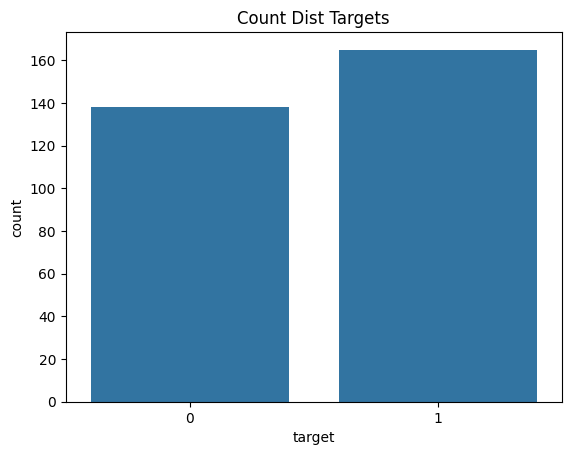

In [4]:
bar, ax = plt.subplots()
ax = sns.barplot(df['target'].value_counts())
ax.set_title('Count Dist Targets');

_Faremos a divisão dos atributos previsões e dos alvos em 2 variáveis distintas_

In [21]:
X = df.drop(columns=['target'])
y = df['target']

# Criando modelos

In [100]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'MLPClassifier': MLPClassifier((16, 16, 16), tol=1e-5, max_iter=400)
}

# Avaliando modelos

Para avaliar os modelos vamos utilizar validação cruzada utilizando uma divisão de 9, ou seja
para cada treino e teste realizado teremos, 270 registro de treino e 33 registros de testes.

In [101]:
accuracy = {k:{'mean':None,'std':None} for k, _ in models.items()}
for k, model in models.items():
    r = cross_val_score(model, X, y, n_jobs=-1, cv=9)
    accuracy[k]['mean'] = r.mean()
    accuracy[k]['std'] = r.std()
for model_name, value in accuracy.items():
    print('*=*'*30)
    print(model_name)
    print(f'Accurácia: {value["mean"]*100:.2f}% ± {value["std"]*100:.2f}')

*=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=*
RandomForestClassifier
Accurácia: 82.47% ± 5.92
*=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=*
AdaBoostClassifier
Accurácia: 80.10% ± 9.42
*=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=*
MLPClassifier
Accurácia: 77.20% ± 10.06


_Não podemos confiar apenas na accuracia de nossos modelos, para isso então faremos mais testes mas agora avaliando métricas como recall e precision de cada um dos modelos utilizados_

In [146]:
skf = StratifiedKFold()
metrics = {}
for k, model in models.items():
    indexes = skf.split(X, y)
    metrics[k] = {'confusion_matrix':[]}
    for i, (train_index, test_index) in enumerate(indexes):
        model.fit(X.iloc[train_index], y.iloc[train_index])
        predicts = model.predict(X.iloc[test_index])
        cm = confusion_matrix(y.iloc[test_index], predicts)
        cr = classification_report(y.iloc[test_index], predicts)
        metrics[k]['confusion_matrix'].append(cm)
        
for model_name, metric in metrics.items():
    cm_final = sum(metric['confusion_matrix'])/len(metric['confusion_matrix'])
    print('*=*'*30)
    print(f'{model_name}\n'.upper())
    print('Confusion Matrix:\n', cm_final,'\n')
    for i in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            if i == k:
                print(f'Class {i}')
                recall = cm_final[i][k] / sum(cm_final[i])
                precision = cm_final[i][k] / sum(cm_final[:, k])
                print(f'Recall: {recall:.2f}')
                print(f'Precision: {precision:.2f}\n')

*=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=*
RANDOMFORESTCLASSIFIER

Confusion Matrix:
 [[21.2  6.4]
 [ 5.  28. ]] 

Class 0
Recall: 0.77
Precision: 0.81

Class 1
Recall: 0.85
Precision: 0.81

*=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=*
ADABOOSTCLASSIFIER

Confusion Matrix:
 [[20.2  7.4]
 [ 5.6 27.4]] 

Class 0
Recall: 0.73
Precision: 0.78

Class 1
Recall: 0.83
Precision: 0.79

*=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=**=*
MLPCLASSIFIER

Confusion Matrix:
 [[18.8  8.8]
 [ 6.4 26.6]] 

Class 0
Recall: 0.68
Precision: 0.75

Class 1
Recall: 0.81
Precision: 0.75



_Se avaliarmos o conjunto das métricas geradas pelos modelos, podemos ver que o modelo que teve melhor desempenho foi o Random forest classifier, então vamos treinar o modelo com toda nossa base de dados e salvar o modelo treinado_

# Treinando e salvando modelo

In [152]:
final_model = RandomForestClassifier()
final_model.fit(X, y)

with open('rfc_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)